In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [226]:
#폰트변경
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])

['NanumMyeongjo']
10.0


In [227]:
#폰트랑 싸이즈 설정
mpl.rcParams['font.family'] = 'NanumMyeongjo'
mpl.rcParams['font.size'] = 10

In [228]:
# store = pd.read_csv('store.csv')
# store

In [229]:
# 앞으로 전체 보는 옵션 주기 
pd.options.display.max_rows=100
pd.options.display.min_rows=100


In [230]:
store2020 = pd.read_csv('store2020.csv',encoding='euc-kr')

In [232]:
store = pd.read_csv('store.csv')


In [7]:
rename = ['year', 'Q', 'store_type_code', 'store_type', 'adress_code', 'adress',
       'service_type_code', 'service_type', 'Q_sale', 'Q_count',
       'week_proportion', 'weekend_proportion', 'Mon_proportion',
       'Tue_proportion', 'Wed_proportion', 'Thu_proportion', 'Fri_proportion',
       'Sat_proportion', 'Sun_proportion', 'time1_proportion',
       'time2_proportion', 'time3_proportion', 'time4_proportion',
       'time5_proportion', 'time6_proportion', 'male_proportion',
       'female_proportion', 'age10_proportion', 'age20_proportion',
       'age30_proportion', 'age40_proportion', 'age50_proportion',
       'age60_proportion', 'week_sale', 'weekend_sale', 'Mon_sale', 'Tue_sale',
       'Wed_sale', 'Thu_sale', 'Fri_sale', 'Sat_sale', 'Sun_sale',
       'time1_sale', 'time2_sale', 'time3_sale', 'time4_sale', 'time5_sale',
       'time6_sale', 'male_sale', 'female_sale', 'age10_sale', 'age20_sale',
       'age30_sale', 'age40_sale', 'age50_sale', 'age60_sale', 'week_count',
       'weekend_count', 'Mon_count', 'Tue_count', 'Wed_count', 'Thu_count',
       'Fri_count', 'Sat_count', 'Sun_count', 'time1_count', 'time2_count',
       'time3_count', 'time4_count', 'time5_count', 'time6_count',
       'male_count', 'female_count', 'age10_count', 'age20_count',
       'age30_count', 'age40_count', 'age50_count', 'age60_count',
       'store_count']
store2020.columns = rename

In [313]:
#년,분기,상권,서비스업종,매출건수,매출 금액 (내가원하는 컬럼만 꺼내서 보기)
ss=s[['year','Q','store_type','service_type','Q_sale','Q_count']]
ss.head()

,year,Q,store_type,service_type,Q_sale,Q_count
0,2020,3,전통시장,청과상,33850673.0,300
1,2020,3,전통시장,일반교습학원,35211411.0,110
2,2020,1,골목상권,일반교습학원,22367209.0,82
3,2020,3,전통시장,호프-간이주점,985883.0,6
4,2020,1,골목상권,한식음식점,431442455.0,18548


# 컬럼 탐색

In [76]:
Q=ss['Q'].value_counts().sort_index()
Q

1    33242
2    33269
3    33043
4    32767
Name: Q, dtype: int64

In [315]:
store_type=ss['store_type'].value_counts().sort_values()
store_type

관광특구     1123
전통시장    16773
발달상권    29533
골목상권    84892
Name: store_type, dtype: int64

In [100]:
service_type = ss['service_type'].value_counts()
service_type.head()

한식음식점      5756
미용실        5243
편의점        4711
커피-음료      4674
호프-간이주점    4557
Name: service_type, dtype: int64

In [130]:
ss['Q_sale'].groupby(ss['Q']==1).size()

Q
False    99079
True     33242
Name: Q_sale, dtype: int64

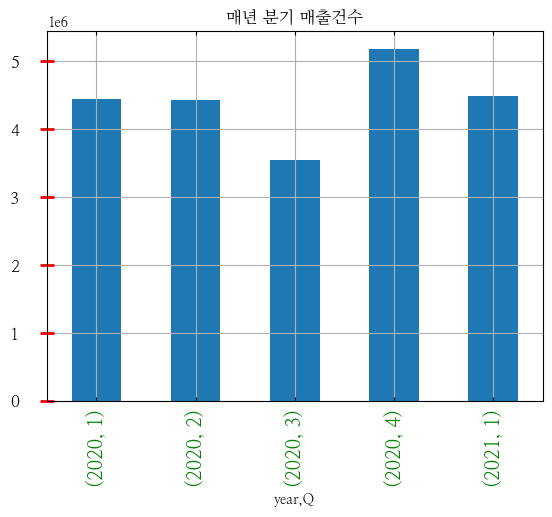

In [284]:
# 매년 분기 마다 매출건수를 알아보았다.

store.groupby(['year', 'Q'])['Q_count'].max().plot(kind='bar')
plt.title('매년 분기 매출건수')
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='green', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=2, color='r')
plt.grid(True) #그리드
plt.show()

In [143]:
# 항목별 데이터 [한 번에] 분석하기
ss.groupby(['year', 'Q'])['Q_sale'].sum()



year  Q
2020  1    1.841727e+13
      2    1.935762e+13
      3    1.837864e+13
      4    1.830326e+13
Name: Q_sale, dtype: float64

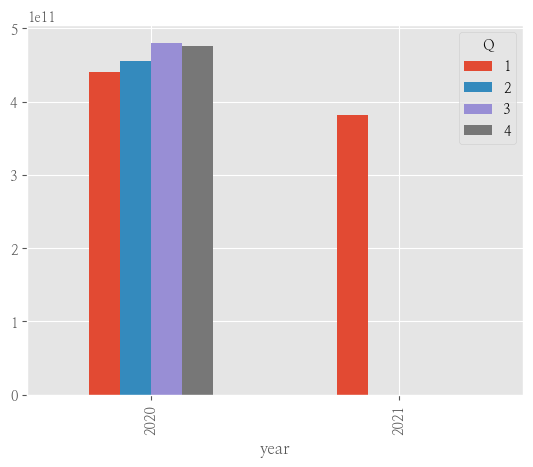

In [382]:
#항목별 데이터 [진짜 한 번에] 분석하기
store.groupby(['year', 'Q'])['Q_sale'].max().unstack().plot(kind='bar')

plt.show()

In [ ]:
# Series 별로 다른 데이터를 분석하려면 (예시)
df_phone.groupby(['month', 'item']).agg({'duration':sum,         # 그룹에 직접 어떤연산을 할지 넣는다
                                         'network_type':'count', # 갯수세기 연산
                                         'date':'first'})        # 그룹내 non_na값중 처음찾기



In [158]:
#2020 년 '분기별 ','골목 상권' ,'한식'의 분기당 (금액)
ss[ss['service_type'] == '한식음식점'].groupby('Q')['Q_sale'].size()
#2020 년 '분기별 ','골목 상권' ,'미용실'의 분기당 (금액)
ss[ss['service_type'] == '미용실'].groupby('Q')['Q_sale'].size()
#2020 년 '분기별 ','골목 상권' ,'편의점'의 분기당 (금액)
ss[ss['service_type'] == '편의점'].groupby('Q')['Q_sale'].size()
#2020 년 '분기별 ','골목 상권' ,'커피'의 분기당 (금액)
ss[ss['service_type'] == '커피-음료'].groupby('Q')['Q_sale'].size()
#2020 년 '분기별 ','골목 상권' ,'호프'의 분기당 (금액)
ss[ss['service_type'] == '호프-간이주점'].groupby('Q')['Q_sale'].size()

#2020 년 '분기별 ','골목 상권' ,'한식'의 분기당 (매출건수)
ss[ss['service_type'] == '한식음식점'].groupby('Q')['Q_count'].size()
#2020 년 '분기별 ','골목 상권' ,'미용실'의 분기당 (매출건수)
ss[ss['service_type'] == '미용실'].groupby('Q')['Q_count'].size()
#2020 년 '분기별 ','골목 상권' ,'편의점'의 분기당 (매출건수)
ss[ss['service_type'] == '편의점'].groupby('Q')['Q_count'].size()
#2020 년 '분기별 ','골목 상권' ,'커피'의 분기당 (매출건수)
ss[ss['service_type'] == '커피-음료'].groupby('Q')['Q_count'].size()
#2020 년 '분기별 ','골목 상권' ,'호프'의 분기당 (매출건수)
ss[ss['service_type'] == '호프-간이주점'].groupby('Q')['Q_count'].size()

Q
1    1170
2    1169
3    1171
4    1164
Name: Q_sale, dtype: int64

tick_params() 함수를 사용하면 눈금의 스타일을 다양하게 설정할 수 있습니다.  

axis는 설정이 적용될 축을 지정합니다. {‘x’, ‘y’, ‘both’} 중 선택할 수 있습니다.  

direction을 ‘in’, ‘out’으로 설정하면 눈금이 안/밖으로 표시됩니다. {‘in’, ‘out’, ‘inout’} 중 선택할 수 있습니다.  

length는 눈금의 길이를 지정합니다.  

pad는 눈금과 레이블과의 거리를 지정합니다.  

labelsize는 레이블의 크기를 지정합니다.  

labelcolor는 레이블의 색상을 지정합니다.  

top/bottom/left/right를 True/False로 지정하면 눈금이 표시될 위치를 선택할 수 있습니다.  

width는 눈금의 너비를 지정합니다.  

color는 눈금의 색상을 지정합니다.  
 
결과는 아래와 같습니다.  
  
 

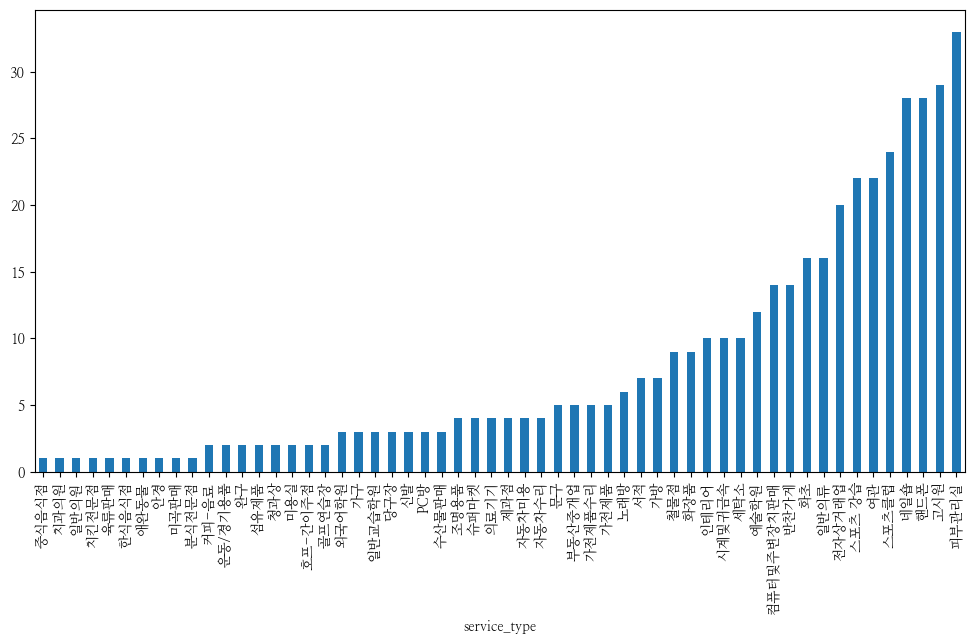

In [346]:
#20대 매출 비율 중 100이넘는 것중 20대 매출
s[s['age20_proportion'] == 100 ].groupby('service_type')['age20_count'].size().sort_values().plot(figsize=(12,6),kind = 'bar')
plt.show()


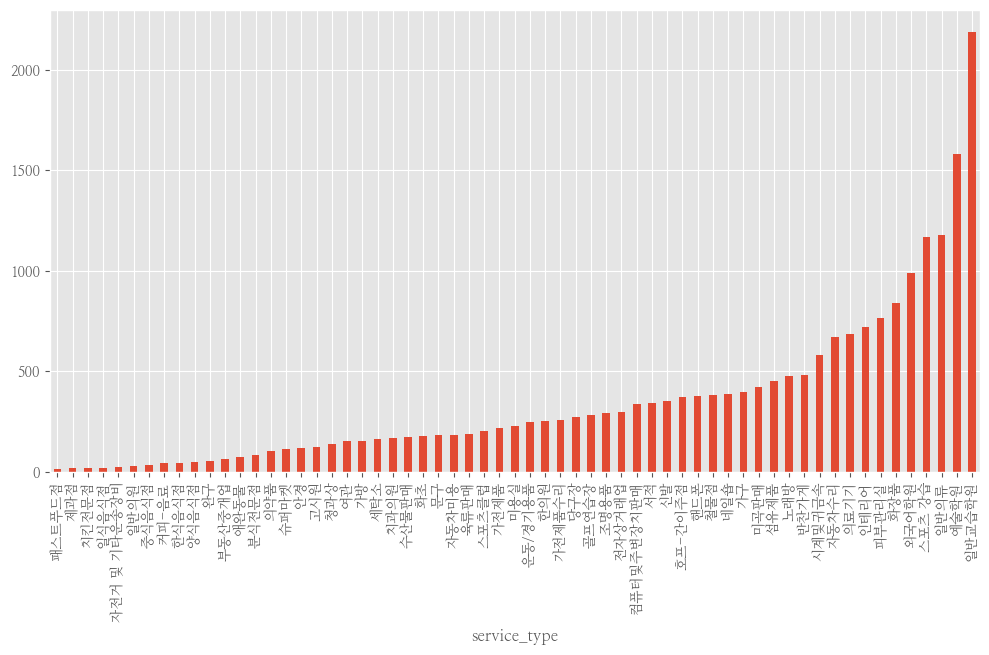

In [379]:
#20대 매출 비율 중 0인 것중 20대 매출
s[s['age20_proportion'] == 0 ].groupby('service_type')['age20_count'].size().sort_values().plot(figsize=(12,6),kind = 'bar')
plt.show()


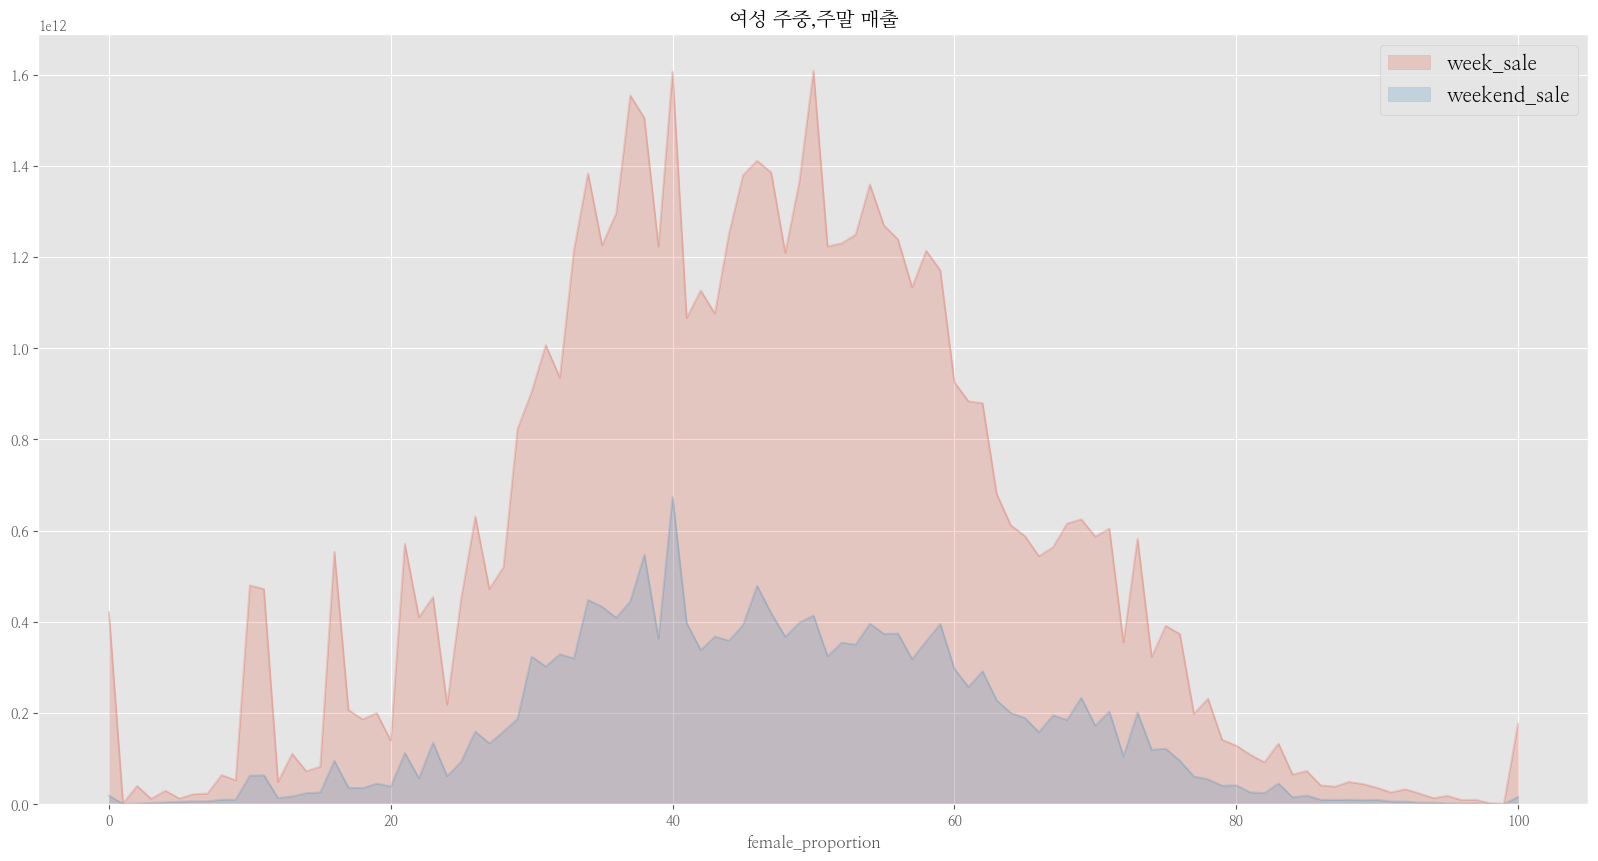

In [374]:
plt.style.use('ggplot')

s.groupby('female_proportion')['week_sale'].sum().plot(kind = 'area', stacked = True, alpha = 0.2 , figsize=(20,10))
s.groupby('female_proportion')['weekend_sale'].sum().plot(kind = 'area', stacked = True, alpha = 0.2 , figsize=(20,10))
plt.title('여성 주중,주말 매출')
plt.legend(loc = 'best',fontsize = 15)
plt.show()

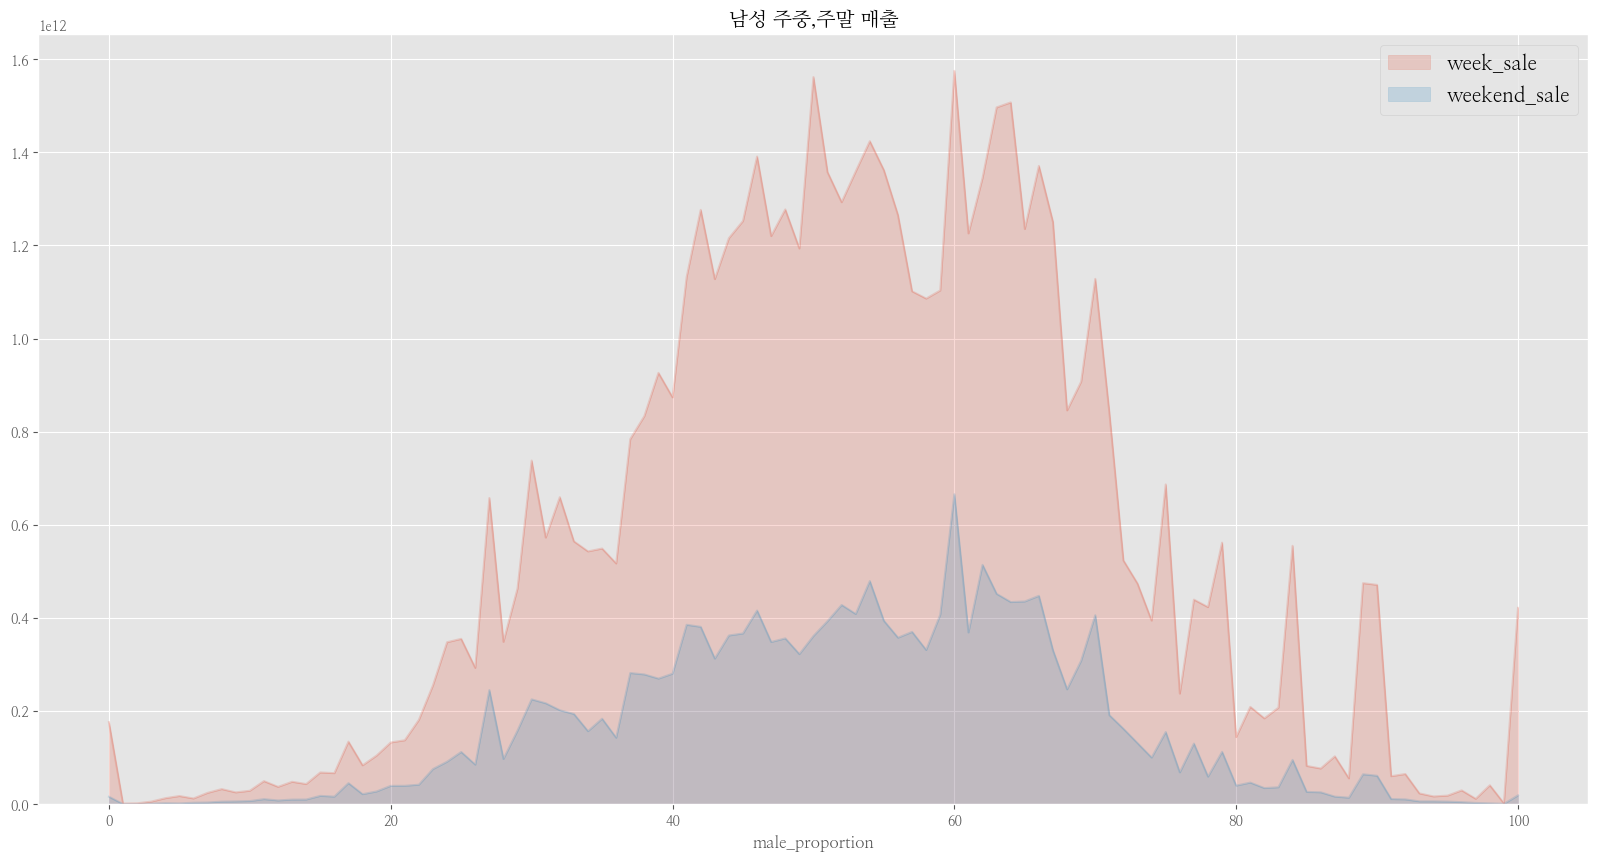

In [375]:
plt.style.use('ggplot')

s.groupby('male_proportion')['week_sale'].sum().plot(kind = 'area', stacked = True, alpha = 0.2 , figsize=(20,10))
s.groupby('male_proportion')['weekend_sale'].sum().plot(kind = 'area', stacked = True, alpha = 0.2 , figsize=(20,10))
plt.title('남성 주중,주말 매출')
plt.legend(loc = 'best',fontsize = 15)
plt.show()

In [351]:
#0개산것과 100개산것을 비교해봐야겠다.
store['male_proportion'].value_counts().head()

0      5893
100    5189
50     4915
47     3424
49     3361
Name: male_proportion, dtype: int64

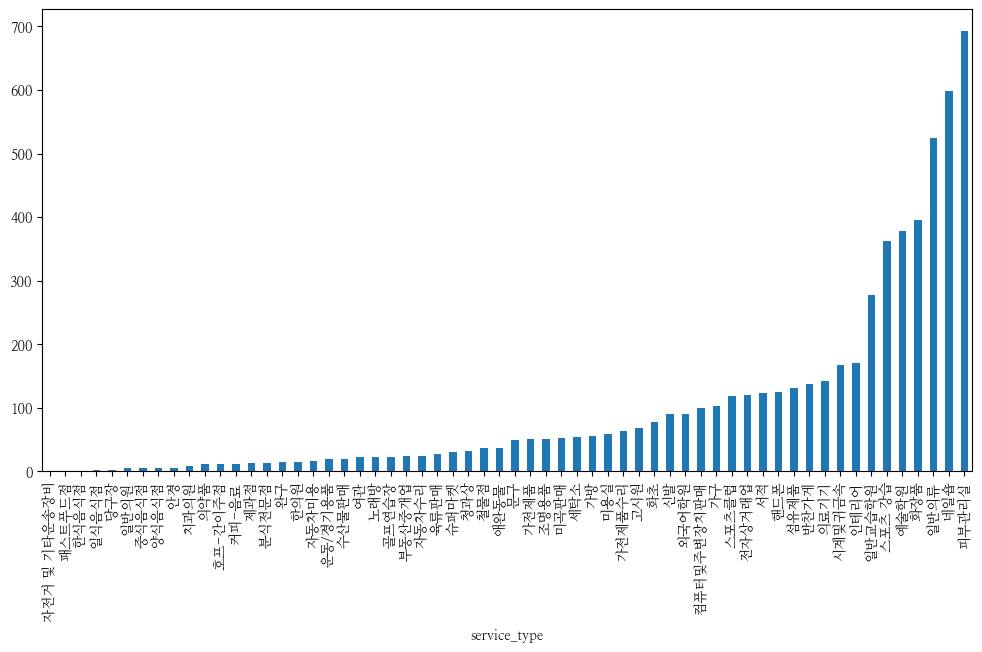

In [347]:
#남성이매출중 0에 해당하는 업종명중 주말매출을 보았다.
store[store['male_proportion']==0].groupby('service_type')['weekend_sale'].size().sort_values().plot(kind = 'bar',figsize=(12,6))
plt.show()
#피부관리질을 제일 많이 안간다.

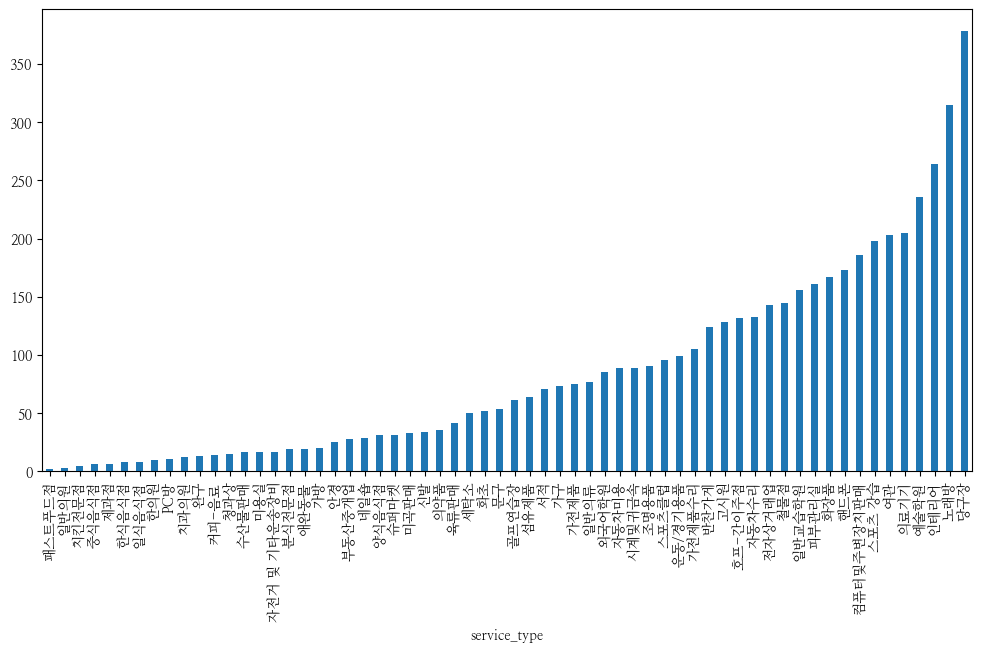

In [349]:
#남성이매출중 100 에해당하는 업종명중 주말매출을 보았다.
store[store['male_proportion']==100].groupby('service_type')['weekend_sale'].size().sort_values().plot(kind = 'bar',figsize=(12,6))
plt.show()
# 당구장을 제일 많이 간다.